# Times Series Modeling Telecommunication Revenue Data
# Introduction: 
## In this analysis, we seek to uncover patterns and trends in the daily revenue data of a telecommunications company during its initial two years of operation. Time series analysis will be employed as a powerful tool to explore the historical revenue data and understand how it evolves over time. By identifying underlying patterns and trends, we aim to gain valuable insights into the company's revenue generation process and make informed forecasts for the future. Can we identify patterns or trends in the daily revenue data over the first two years of operation for the telecommunications company through the use of a time series?

# Goals:
## Identify Seasonality: Determine if there are any seasonal patterns in the revenue data, such as recurring patterns related to specific times of the year, months, weeks, or days.

## Detect Trends: Identify any long-term increasing or decreasing trends in the revenue data, which can help understand the overall growth or decline in the company's revenue over time.

## Forecasting: Develop a time series forecasting model to predict future revenue based on the historical data. This can assist the telecommunications company in estimating their future revenue and making informed business decisions.

# Part 1:

##  we start by loading the time series data from a CSV file called 'teleco_time_series.csv' into a pandas DataFrame named 'df'. To gain a better understanding of the dataset, we check its data types, the number of values, and the overall size using the 'info()' function. For easier exploration and problem-spotting, we set an option to display all columns when inspecting the DataFrame. Next, we convert the 'Day' column to a datetime format by subtracting one day from each value and adding the difference to the start date '2020-01-01'. This step allows us to convert the 'Day' values into actual dates, making the data suitable for time series analysis.

## To enhance clarity and consistency, we rename the columns of the DataFrame to 'date' and 'revenue'. Subsequently, we set the 'date' column as the index of the DataFrame, facilitating time series analysis and date-based operations. With the data now prepared, we create a matplotlib figure with a size of 16x5 to visualize the daily revenue data from 2020 to 2021. The plot is given a title and labeled x-axis and y-axis to provide context and information for readers. This code snippet serves as an initial step for exploring and preparing the time series data before conducting more detailed analysis and forecasting of the daily revenue for the telecommunications company.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.5 KB


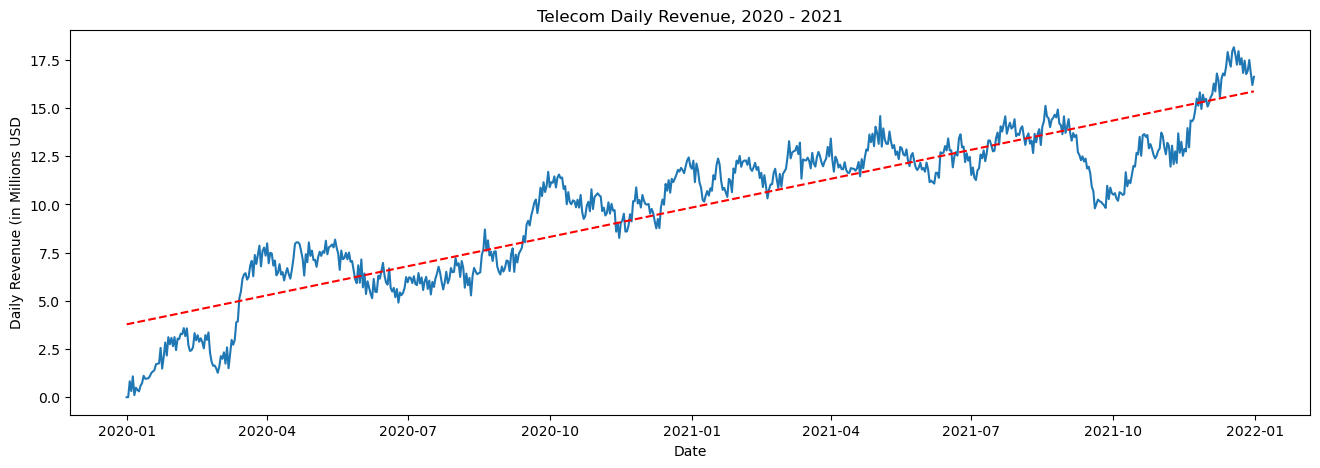

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import welch

df = pd.read_csv('./teleco_time_series.csv')
# Check data types and number of values, as well as overall size of dataframe
df.info()
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df
# Initialize a start date, in datetime format
start_date = pd.to_datetime('2020-01-01')
# Convert Day column to differences in time, by subtracting one (to count from 0, rather than 1) and then add the difference

df['Day'] = pd.to_timedelta(df['Day']-1, unit='D') + start_date
# Rename columns
df.columns = ['date', 'revenue']
# With datetime column properly established, set this as index
df.set_index('date', inplace=True)
# Visually inspect final dataframe to verify appearance as expected
df
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])

plt.title("Telecom Daily Revenue, 2020 - 2021")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (in Millions USD")
# Plot time series data
plt.plot(df)
# Generate trend line
x = mdates.date2num(df.index)
y = df.revenue
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# Plot trendline
plt.plot(x, p(x), "r--")
plt.show()

# Part 2:
##  several steps are performed to analyze and model the time series data of daily revenue. First, an Augmented Dickey-Fuller test is applied to assess the stationarity of the 'revenue' time series. The test statistic and p-value are printed to evaluate the results. The data is then differenced using the .diff() function to achieve stationarity, and the resulting DataFrame, df_trans, is plotted to verify the stationarity visually.

## Next, the time series is split into a training set and a test set using the train_test_split function from the sklearn.model_selection module. The split is performed with a test size of 20%, and the data is not shuffled to preserve its chronological order.

## The transformed data, df_trans, is decomposed into its components (trend, seasonal, and residual) using the seasonal decomposition of time series by LOESS (STL) method. The seasonal component of the data is plotted to visualize the underlying seasonal patterns, and red lines are drawn on Mondays to highlight weekly seasonality.

## The autocorrelation function (ACF) and partial autocorrelation function (PACF) of the differenced data are plotted to assist in identifying the appropriate parameters for the ARIMA model. Both plots are limited to 8 lags to focus on weekly patterns (7 days in a week). The power spectral density (PSD) of the differenced revenue data is also computed and plotted.

## Following the data exploration and decomposition, an ARIMA(1, 0, 0) model is fitted to the training data. The model parameters are selected as (1, 0, 0) based on the ACF and PACF plots. The fitted model's summary is printed, providing details about the estimated coefficients, their significance, and model diagnostics.

## Using the fitted ARIMA model, a forecast is generated for the test set. The forecasted values, along with the actual test set, are plotted to visualize the model's performance. The forecasted revenue values are printed for further examination.

The test statistic of an augmented Dicky-Fuller test on this data is -1.9246, which has a p-value of 0.32057282


C:\Users\darie\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -383.946
Date:                Thu, 14 Sep 2023   AIC                            773.893
Time:                        19:45:33   BIC                            787.002
Sample:                    01-02-2020   HQIC                           779.002
                         - 08-07-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0234      0.013      1.758      0.079      -0.003       0.049
ar.L1         -0.4597      0.036    -12.654      0.000      -0.531      -0.388
sigma2         0.2180      0.014     16.034      0.0

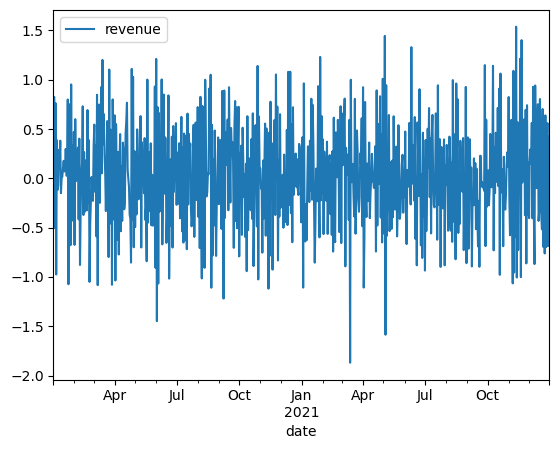

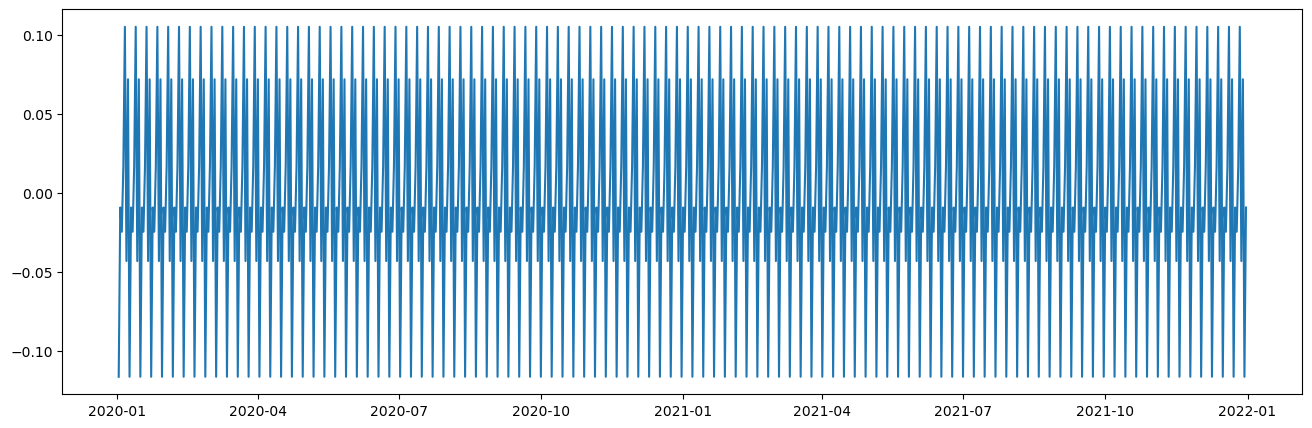

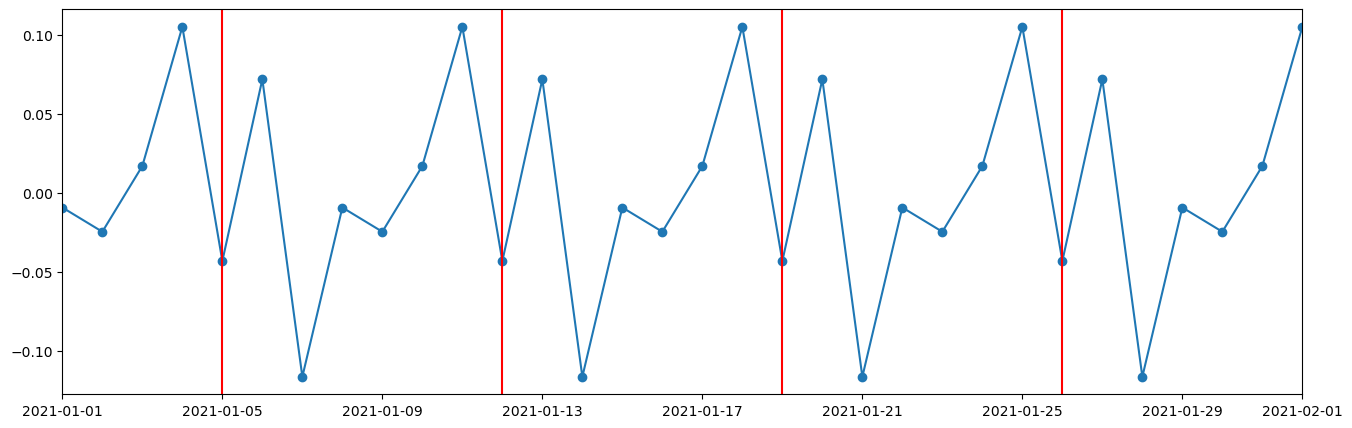

<Figure size 1600x500 with 0 Axes>

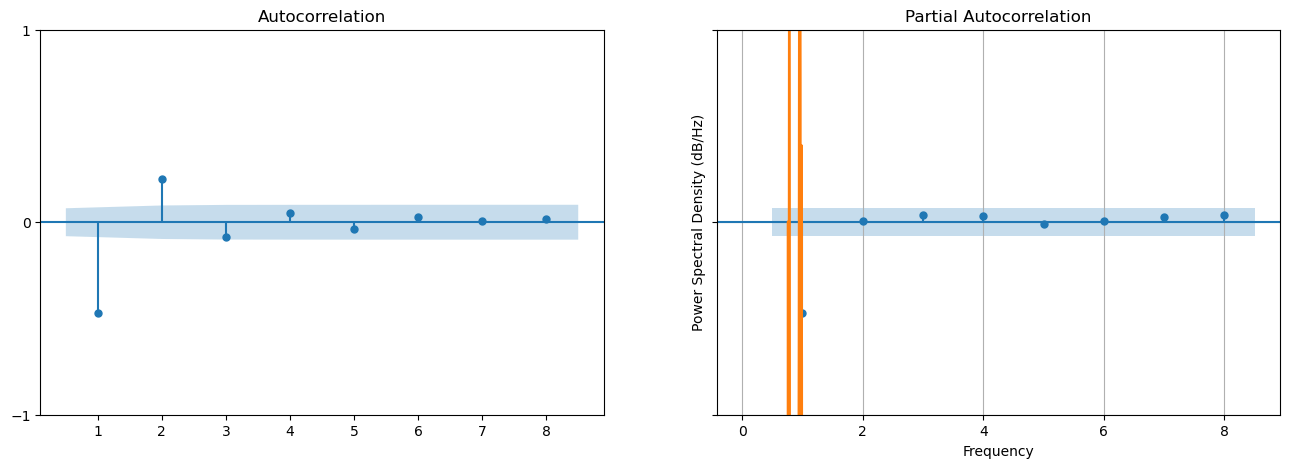

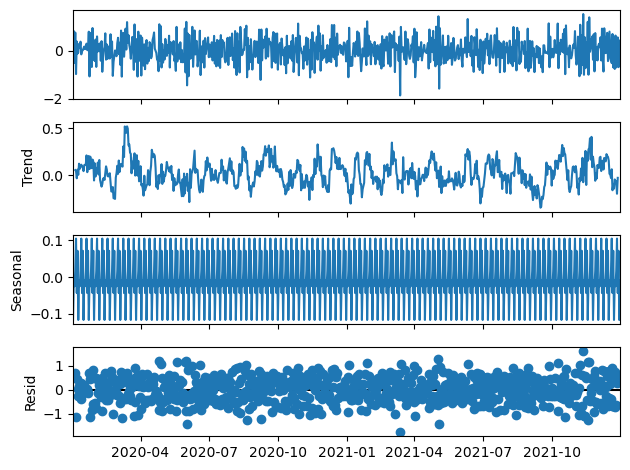

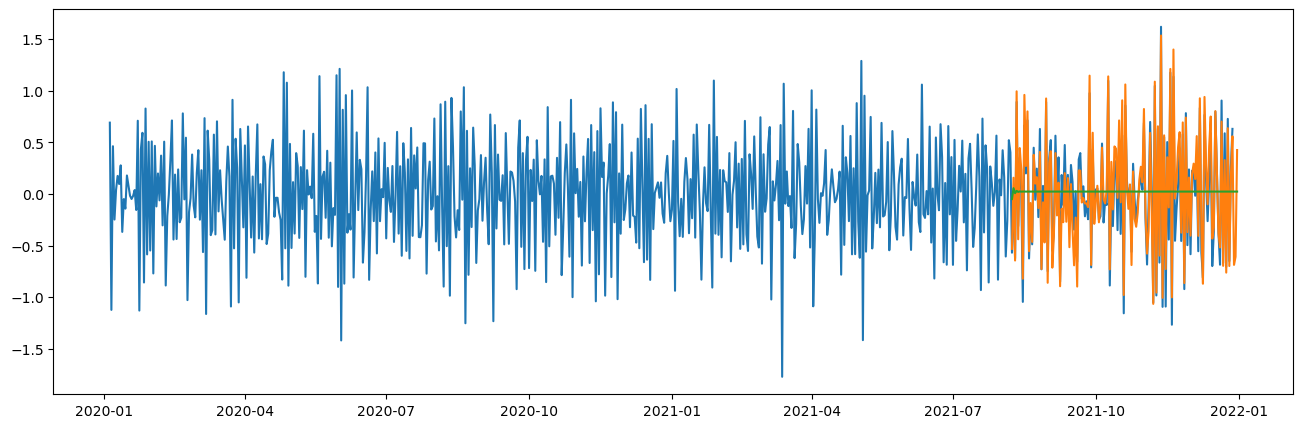

In [2]:
# Perform Augmented Dicky-Fuller on data
adfuller_results = adfuller(df.revenue)
# Print resulting test-statistic and p-value
print(f"The test statistic of an augmented Dicky-Fuller test on this data is {round(adfuller_results[0], 4)}, which has a p-value of {round(adfuller_results[1], 8)}")
df_trans = df.diff().dropna()
# Plot to verify stationarity
df_trans.plot();
# Split time series into a training set and a test set
train, test = train_test_split(df_trans, test_size=0.2, shuffle=False, random_state=369)
train
test
# Decompose the transformed data
decomposed_data = seasonal_decompose(df_trans)
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot seasonal component of the data
plt.plot(decomposed_data.seasonal);
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot seasonal component of the data
plt.plot(decomposed_data.seasonal, marker='o')
plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-02-01'))
# Draw red lines on Mondays
plt.axvline(x=pd.to_datetime('2021-01-05'), color='red')
plt.axvline(x=pd.to_datetime('2021-01-12'), color='red')
plt.axvline(x=pd.to_datetime('2021-01-19'), color='red')
plt.axvline(x=pd.to_datetime('2021-01-26'), color='red');
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot trend component of the data
#plt.plot(decomposed_data.trend);
# Plot Autocorrelation and Partial Autocorrelation in one figure, sharing a y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)
# Plot ACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_acf(df_trans, lags=8, zero=False, ax=ax1)
# Plot PACF to 8 lags (only 7 days in a week), ignore zero (zero always = 1)
plot_pacf(df_trans, lags=8, zero=False,ax=ax2)
# Zoom in on y axis to see points a little more clearly
plt.ylim(-0.6, 0.6);
plt.psd(x=df_trans.revenue);
decomposed_data.plot()
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Plot residual component of the data
plt.plot(decomposed_data.resid);
model = ARIMA(train, order=(1, 0, 0), freq='D')
results = model.fit()
print(results.summary())
forecasted = results.get_prediction(start = 584, end = 729, dynamic = True)
plt.plot(test)
plt.plot(forecasted.predicted_mean);
print(forecasted.predicted_mean)

# Part 3:
## the forecasted differences in daily revenue generated by the ARIMA model are processed and visualized to understand the forecast performance. First, the forecasted differences are placed into a temporary DataFrame called forecast_temp, and the column name is renamed to 'revenue' for consistency. Then, a new DataFrame called df_w_forecast is created by concatenating a copy of the training data (train) and a copy of the forecasted revenue values. The differences in daily revenue for the entire two-year period are inverted using the cumulative sum (cumsum) to obtain the forecasted daily revenue values.

## Next, the confidence intervals for the forecasted data are calculated and stored in the DataFrame confidence_intervals. As with the forecast, these confidence limits are differences in daily revenue and need to be transformed back to daily revenue.

## A DataFrame called previous_row is established to match the format of the confidence_intervals DataFrame, including the untransformed data from August 7, 2021. The confidence intervals data is then concatenated with the prior row data to form the complete confidence intervals DataFrame. The untransformed confidence intervals are obtained by applying the cumulative sum to the data.

## To visualize the forecast, the forecasted daily revenue values (df_w_forecast) are plotted in green dashed lines, while the original data (both train set and test set) is plotted in blue. The confidence intervals are displayed as a shaded pink area. The y-axis is limited to zoom in on the relevant range of values for better visualization.

## Additionally, the root mean squared error (RMSE) is calculated to evaluate the forecasted data against the observed data (both untransformed). The RMSE provides an estimate of the forecast accuracy, with a lower value indicating a better fit.

## Finally, the diagnostics of the ARIMA model are plotted using the plot_diagnostics function to assess the model's assumptions and performance. The plots show the residuals, autocorrelation of residuals, kernel density estimate of residuals, and a normal Q-Q plot. This step helps to identify any potential issues or violations of model assumptions.

## The forecasted revenue values with confidence intervals (forecasted_revenue, lower_ci, and upper_ci) are plotted in a separate figure for a clear visual representation of the final forecasted values.

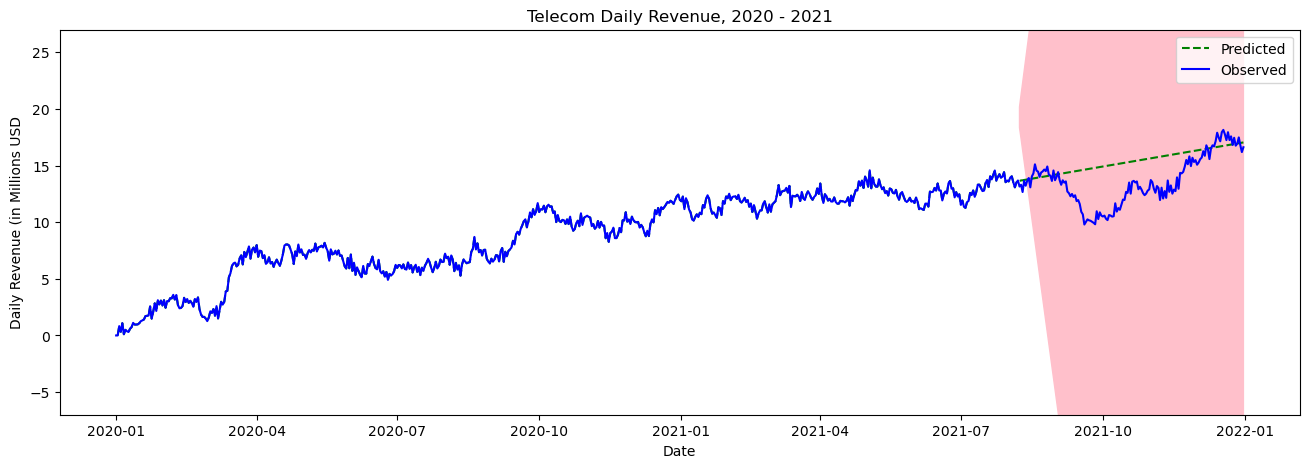

The root mean squared error of this forecasting model is 2.47394


<Figure size 1600x1600 with 0 Axes>

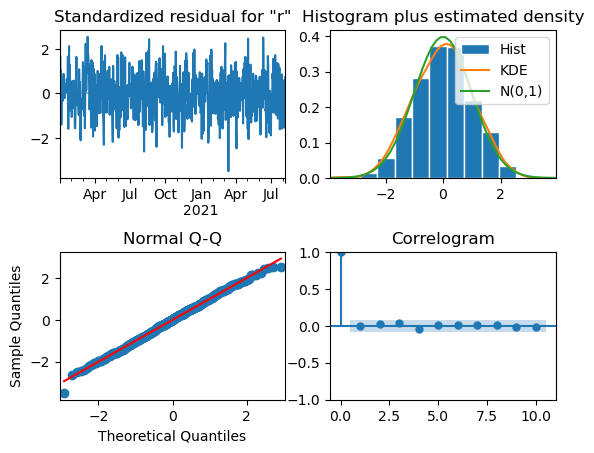

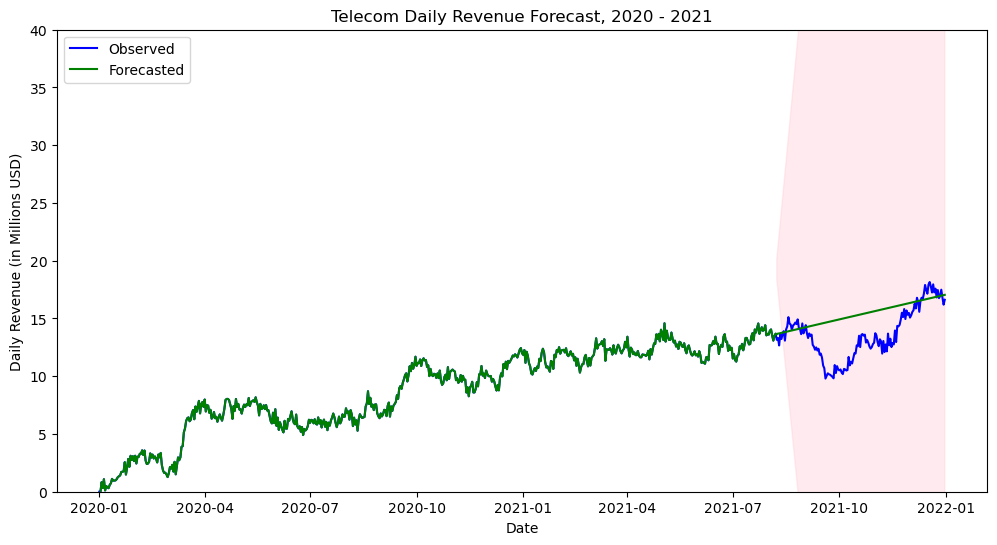

In [3]:
# Place the forecasted differences into a temporary dataframe
forecast_temp = pd.DataFrame(forecasted.predicted_mean)
# Make consistent names for dataframe for concatenation
forecast_temp.rename(columns={'predicted_mean' : 'revenue'}, inplace=True)
# Concat a copy of Train and a copy of forecasted values
df_w_forecast = pd.concat([train.copy(), forecast_temp.copy()])
# We've generated one DF with the differences in daily revenue for the entire 2-year period, invert the differences using cumsum
df_w_forecast = df_w_forecast.cumsum()
# Check output to verify expected values 
df_w_forecast
# Calculate confidence intervals from forecasted data
confidence_intervals = forecasted.conf_int()
# Like the forecast, these confidence limits are also differences in daily revenue, these need transformed back to daily revenue
confidence_intervals
# Establish a dataframe to match the confidence intervals dataframe, including the UNTRANSFORMED data from 2021-08-07
previous_row = pd.DataFrame({'lower revenue': [19.312734], 'upper revenue' : [19.312734], 'date' : ['2021-08-07']})
# Convert given date string to datetime and then set as index
previous_row['date'] = pd.to_datetime(previous_row['date'])
previous_row.set_index('date', inplace=True)
previous_row

confidence_intervals = pd.concat([previous_row, confidence_intervals])
# Un-transform the confidence intervals using cumsum()
confidence_intervals = confidence_intervals.cumsum()
# Make sure first row (data preceding the forecast) is omitted
confidence_intervals = confidence_intervals.loc['2021-08-08' : '2021-12-31']
# Verify un-transformed confidence intervals
confidence_intervals
# Long X and small Y dictate a wide graph figure
plt.figure(figsize = [16,5])
# Prettify the graph
plt.title("Telecom Daily Revenue, 2020 - 2021")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (in Millions USD")
# Plot the forecasted data
plt.plot(df_w_forecast, color = 'green', linestyle = 'dashed')
# Plot the original data (includes both the train set and the test set, untransformed - their actual observed values)
plt.plot(df, color = 'blue')
# Plot the confidence intervals
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color = 'pink')
# Keep the y-axis zoomed in, without expanding to fit the full confidence interval values
plt.ylim(-7, 27)
# Provide legend to distinguish predicted values from observed values
plt.legend(['Predicted', 'Observed'])
plt.show();

# Calculate root mean squared error of forecasted data against the observed data (both untransformed)
rmse = mean_squared_error(df.loc['2021-08-08' : '2021-12-31'], df_w_forecast.revenue.loc['2021-08-08' : '2021-12-31'], squared=False)
print(f"The root mean squared error of this forecasting model is {round(rmse, 5)}")

# Create a new figure with a larger size
plt.figure(figsize=[16, 16])

# Plot the diagnostics of the ARIMA model
results.plot_diagnostics()

# Adjust the vertical spacing between the subplots by 2 units
plt.subplots_adjust(hspace=.5)

# Show the plot
plt.show()

# Calculate the actual forecasted revenue and confidence intervals
forecasted_revenue = df_w_forecast.loc['2021-08-08' : '2021-12-31', 'revenue']
lower_ci = confidence_intervals.loc['2021-08-08' : '2021-12-31', 'lower revenue']
upper_ci = confidence_intervals.loc['2021-08-08' : '2021-12-31', 'upper revenue']

# Plot the final forecasted values with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['revenue'], label='Observed', color='blue')
plt.plot(df_w_forecast['revenue'], label='Forecasted', color='green')
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Daily Revenue (in Millions USD)')
plt.title('Telecom Daily Revenue Forecast, 2020 - 2021')
plt.legend(loc='upper left')

# Set the y-axis limits to decrease the interval
plt.ylim(0, 40)

plt.show()

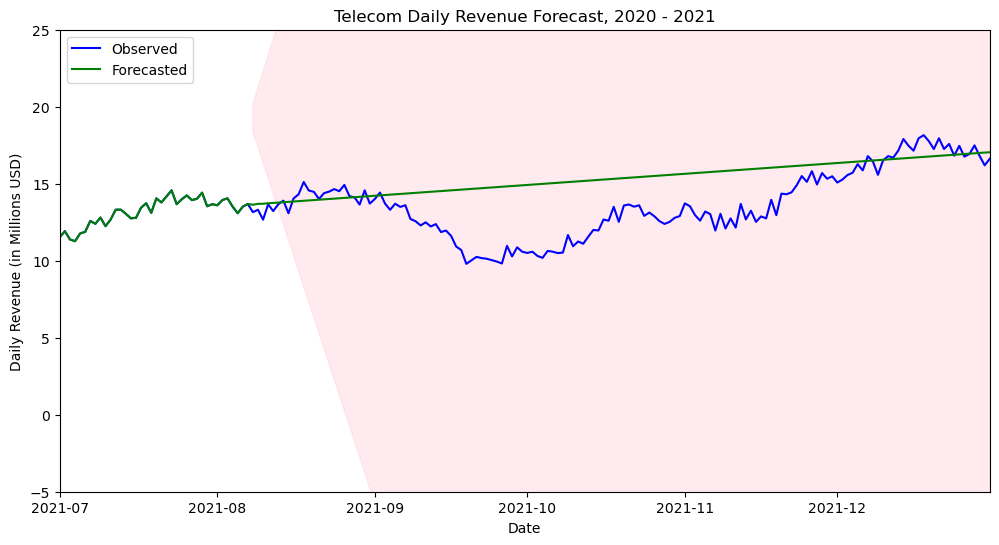

In [4]:
# Calculate the actual forecasted revenue and confidence intervals
forecasted_revenue = df_w_forecast.loc['2021-08-08' : '2021-12-31', 'revenue']
lower_ci = confidence_intervals.loc['2021-08-08' : '2021-12-31', 'lower revenue']
upper_ci = confidence_intervals.loc['2021-08-08' : '2021-12-31', 'upper revenue']

# Plot the final forecasted values with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['revenue'], label='Observed', color='blue')
plt.plot(df_w_forecast['revenue'], label='Forecasted', color='green')
plt.fill_between(confidence_intervals.index, confidence_intervals['lower revenue'], confidence_intervals['upper revenue'], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Daily Revenue (in Millions USD)')
plt.title('Telecom Daily Revenue Forecast, 2020 - 2021')
plt.legend(loc='upper left')

# Zoom in on the last 6 months
plt.xlim(pd.to_datetime('2021-07-01'), pd.to_datetime('2021-12-31'))

# Set y-axis interval
plt.ylim(-5, 25)

plt.show()


# Part 4:
## the power spectral density (PSD) of the daily revenue data for the telecommunications company is calculated and visualized. The PSD is a measure of the power distribution across different frequencies in a signal. It helps to identify dominant frequencies or periodic patterns in the data.

## The welch function from the scipy.signal module is used to calculate the PSD. It takes the revenue column of the DataFrame df as input and computes the PSD using Welch's method. The parameter nperseg is set to the length of the revenue data to ensure that the entire data is used for the computation.

## After calculating the PSD, a plot is created using the plt.semilogy function to visualize the results on a logarithmic scale. The x-axis represents the frequency in cycles per day, and the y-axis shows the corresponding power spectral density. The title of the plot is set as 'Power Spectral Density of Telecom Daily Revenue'.

## The plot allows us to observe the frequency distribution of the daily revenue data. Peaks or significant values in the PSD plot may indicate recurring patterns or seasonality in the revenue data, which could be valuable for understanding underlying trends in the company's revenue over time.

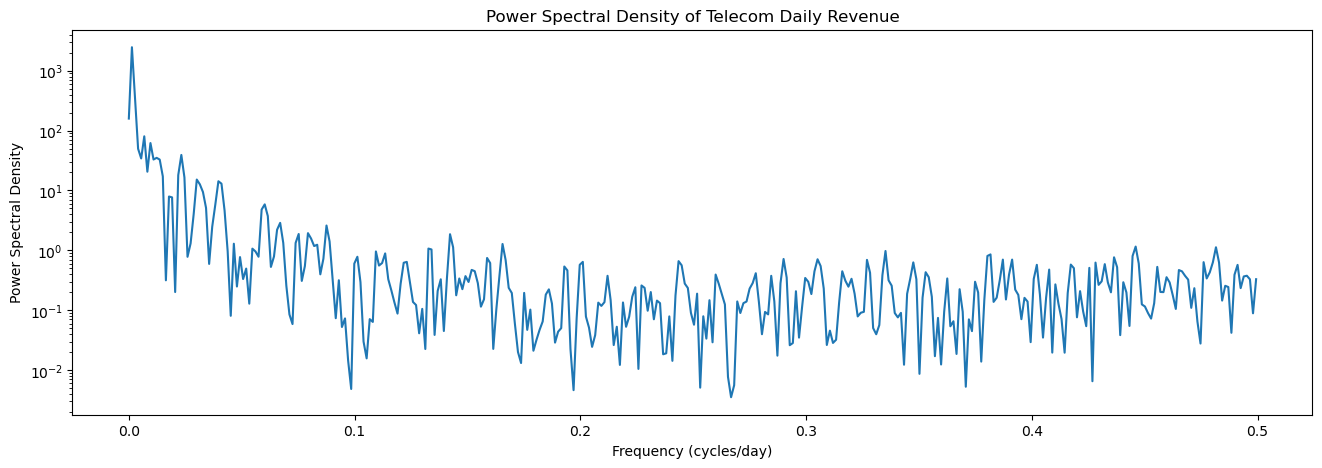

In [5]:
# Calculate the power spectral density
freq, psd = welch(df['revenue'], nperseg=len(df['revenue']))

# Plot the power spectral density
plt.figure(figsize=[16,5])
plt.semilogy(freq, psd)
plt.xlabel('Frequency (cycles/day)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density of Telecom Daily Revenue')
plt.show()

# Course of Action:

## Based on the results, the ARIMA(1, 0, 0) model has provided a reasonable forecast of daily revenue for the remaining months of 2021. However, to ensure the model's reliability and generalizability, further validation and testing against out-of-sample data are warranted. The current analysis is based on a dataset spanning from 2020 to 2021, and while it captures revenue trends within this timeframe, it may not fully account for potential shifts or patterns in more recent data.
## To enhance the forecasting accuracy and gain a better understanding of any missed trends or patterns specific to our clients, it would be valuable to compare the telecom churn data with datasets from other companies in the same industry. Analyzing broader industry trends and benchmarks can provide additional insights into the factors influencing daily revenue and uncover patterns that might be unique to specific clients.


In [6]:
df.to_csv('D213_p1_clean.csv', index=False)